We have packaged `extractTransform` from Vega Lite up as a mime renderer:

In [2]:
from IPython.display import display
from jupyterlab_omnisci.altair import VegaLite, extract_spec, EMPTY_SPEC

Let's use this example vega lite, which we put in a class so that it is rendered:

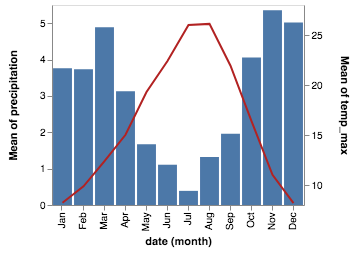

In [3]:
SPEC = VegaLite({
 "data": {
  "url": "https://vega.github.io/vega-lite/data/seattle-weather.csv"
 },
 "layer": [
  {
   "mark": "bar",
   "encoding": {
    "x": {
     "timeUnit": "month",
     "field": "date",
     "type": "ordinal"
    },
    "y": {
     "aggregate": "mean",
     "field": "precipitation",
     "type": "quantitative",
     "axis": {
      "grid": False
     }
    }
   }
  },
  {
   "mark": "line",
   "encoding": {
    "x": {
     "timeUnit": "month",
     "field": "date",
     "type": "ordinal"
    },
    "y": {
     "aggregate": "mean",
     "field": "temp_max",
     "type": "quantitative",
     "axis": {
      "grid": False
     },
     "scale": {
      "zero": False
     }
    },
    "color": {
     "value": "firebrick"
    }
   }
  }
 ],
 "resolve": {
  "scale": {
   "y": "independent"
  }
 }
})
SPEC

Now, let's transform this spec using`extractTransform` and render the result and save it:

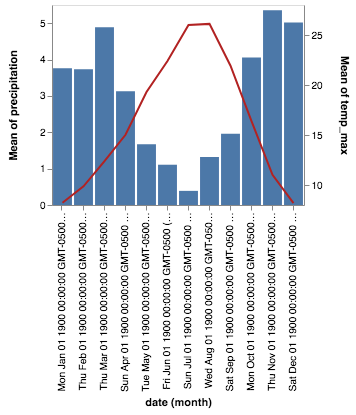

In [4]:
from IPython.display import display
import IPython.display

display_id = display(VegaLite(EMPTY_SPEC), display_id=True)

UDPATED_SPEC = None

def on_transformed(updated):
    global UDPATED_SPEC
    UDPATED_SPEC = updated
    display_id.update(VegaLite(updated))

extract_spec(SPEC.data, on_transformed)

Now let's look at the updated  spec:

In [5]:
UDPATED_SPEC

{'data': {'url': 'https://vega.github.io/vega-lite/data/seattle-weather.csv'},
 'resolve': {'scale': {'y': 'independent'}},
 'layer': [{'transform': [{'timeUnit': 'month',
     'field': 'date',
     'as': 'month_date'},
    {'aggregate': [{'op': 'mean',
       'as': 'mean_precipitation',
       'field': 'precipitation'}],
     'groupby': ['month_date']}],
   'mark': 'bar',
   'encoding': {'x': {'title': 'date (month)',
     'type': 'ordinal',
     'field': 'month_date',
     'axis': {'format': '%b'}},
    'y': {'title': 'Mean of precipitation',
     'type': 'quantitative',
     'axis': {'grid': False},
     'field': 'mean_precipitation'}}},
  {'transform': [{'timeUnit': 'month', 'field': 'date', 'as': 'month_date'},
    {'aggregate': [{'op': 'mean', 'as': 'mean_temp_max', 'field': 'temp_max'}],
     'groupby': ['month_date']}],
   'mark': 'line',
   'encoding': {'x': {'title': 'date (month)',
     'type': 'ordinal',
     'field': 'month_date',
     'axis': {'format': '%b'}},
    'y': {